In [1]:
#IMPORTS 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mat
from cycler import cycler
from matplotlib import colors 
from numba import njit,prange 
from tqdm.notebook import tqdm
from scipy import integrate
import os
from scipy.interpolate import interp1d 
#MATPLOTLIB PERSONAL CONFIG  
plt.rcParams["figure.figsize"] = (5,5) 
plt.rcParams["lines.linewidth"] = 1.0 
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["axes.grid"] = "True" 
plt.rcParams["grid.alpha"] = 0.0 
plt.rcParams["figure.dpi"] = 150
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['axes.spines.right'] = True 
plt.rcParams['axes.spines.top'] = True
plt.rcParams["grid.linestyle"] = "--" 
plt.rcParams["legend.frameon"] = False 
plt.rcParams["patch.facecolor"] ="white" 
plt.rcParams.update({'errorbar.capsize': 4}) 
plt.rcParams["savefig.bbox"] = 'tight'
#MATPLOTLIB IMSHOW COLORS 
#plt.rcParams["axes.prop_cycle"]= cycler('color',["#264653", "#2a9d8f","#e9c46a","#f4a261"])
#color = np.array(["#264653", "#2a9d8f","#e9c46a","#f4a261"]) 
#cmap1 = colors.LinearSegmentedColormap.from_list("mycmap", np.flip(color))
#plt.rcParams['image.cmap'] =  cmap1

mapa_teste = colors.LinearSegmentedColormap.from_list("mycmap", np.array(["red","blue","green","orange"]))

In [2]:
def compute_moments(M, mu, sigma):
    
    m = np.zeros(M)
    x = np.linspace(-0.99999, 0.99999, 100000)
       
    for i in range (M):
        
        m[i] = np.trapz(np.cos(i*np.arccos(x))*np.exp(-0.5*(x - mu)**2/(sigma**2))/(np.sqrt(2*np.pi)*sigma), x)
    
    return m

In [3]:
m = compute_moments(4*16384, 3.2/(2.1+2.5/2), 0.001)

In [50]:
big_m = compute_moments(4*16384, 3.2/(2.1+2.5/2), 0.001)

np.savetxt("gaussian_moments.dat", big_m)

In [4]:
def kernel(m, M):
    
    a = (M - m + 1)*np.cos(np.pi*m/(M + 1))
    b = np.sin(np.pi*m/(M + 1))/np.tan(np.pi/(M + 1))
    
    return (a + b)/(M + 1)

def resum(x, m, M):
    
    g = np.zeros(len(x))
    g += m[0]*kernel(0, M)
    
    for i in range (M - 1):
        
        g += 2*m[i + 1]*np.cos((i + 1)*np.arccos(x))*kernel(i + 1, M)
    
    return g/(np.pi*np.sqrt(1 - x**2))

In [5]:
def gaussian_g(x, mu, sigma):
    
    return np.exp(-0.5*(x - mu)**2/(sigma**2))/(np.sqrt(2*np.pi)*sigma)

def log_gaussian(x, mu, sigma):
    
    return -0.5*(x - mu)**2/(sigma**2) - np.log(np.sqrt(2*np.pi)*sigma)

In [6]:
x = np.linspace(0.95, 0.97, 10000)
y = resum(x, m, 8192)
g = gaussian_g(x, 3.2/(2.1+2.5/2), 0.001)
#log_g = log_gaussian(x, 2, 0.01)

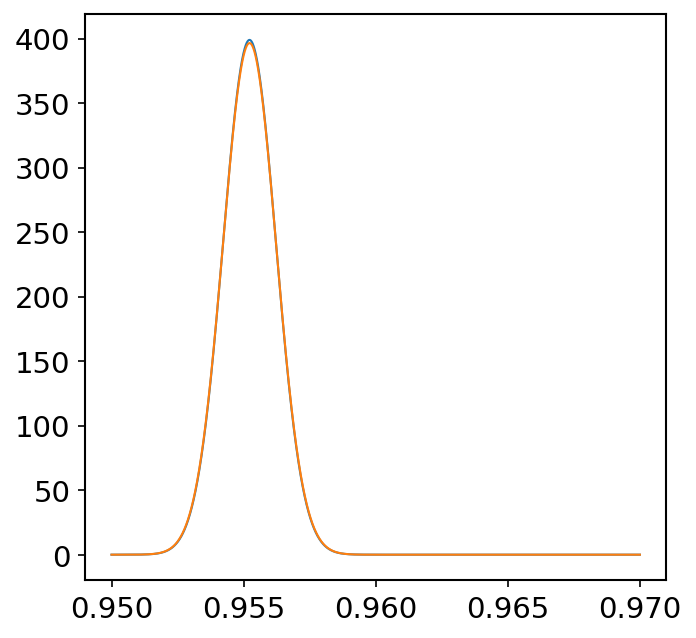

In [7]:
plt.plot(x, g)
plt.plot(x, y)

#plt.ylim(top=380, bottom=370)
#plt.xlim(left = 0.895, right = 0.896)

In [9]:
g = gaussian(x, 0, 0.01)

NameError: name 'gaussian' is not defined

In [10]:
plt.plot(x, log_g/np.log(y))
plt.xlim(left = -0.1, right = 0.1)
plt.ylim(top = 1, bottom = -1)

NameError: name 'log_g' is not defined

In [ ]:
plt.plot(x, g)
plt.plot(x, y)

plt.ylim(top = 0.0000001, bottom = -0.0000001)
plt.xlim(left = -0.2, right = -0.1)